<a href="https://colab.research.google.com/github/vongmaianh170196/statistical_data_analysis_utu/blob/main/Exercise_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

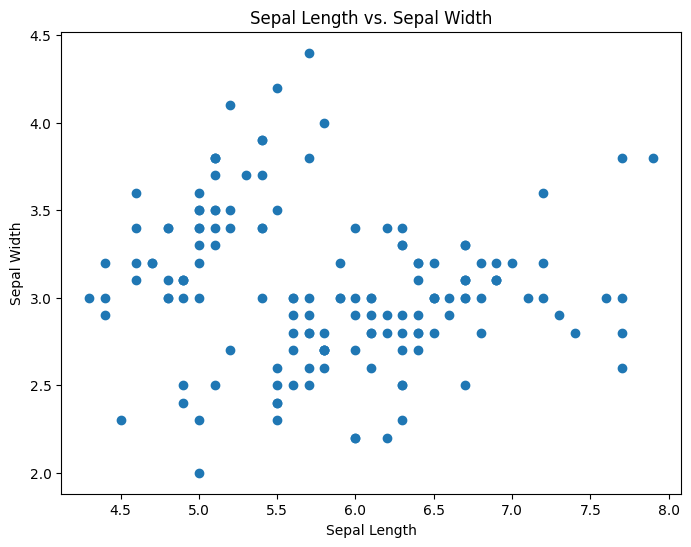

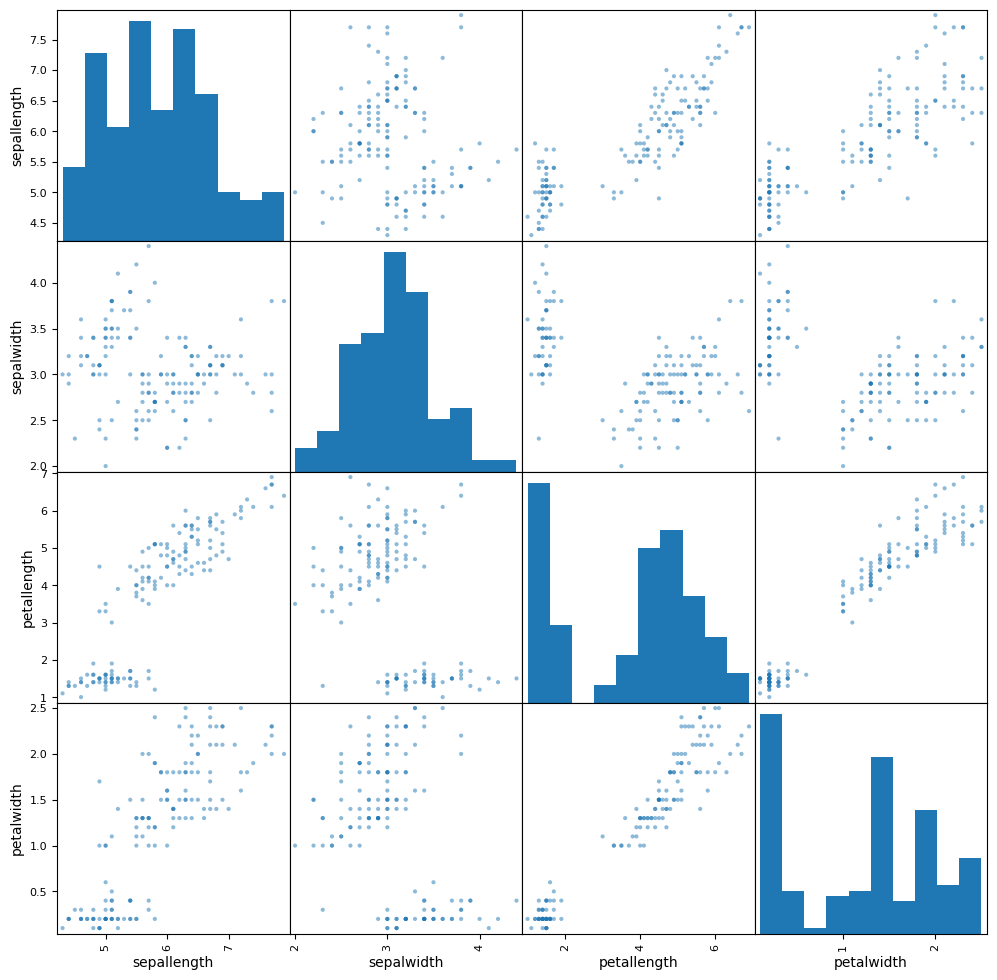

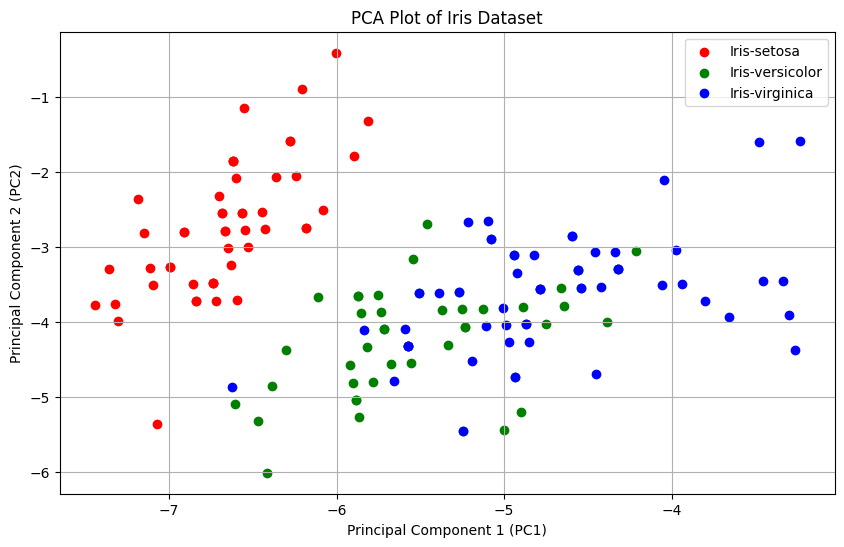

original data features:
sepallength  sepallength    1.000000
sepalwidth   sepalwidth     1.000000
petallength  petallength    1.000000
petalwidth   petalwidth     1.000000
petallength  petalwidth     0.962757
dtype: float64


PCA features:
PC1  PC1    1.000000
PC2  PC2    1.000000
PC1  PC2    0.108048
PC2  PC1    0.108048
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


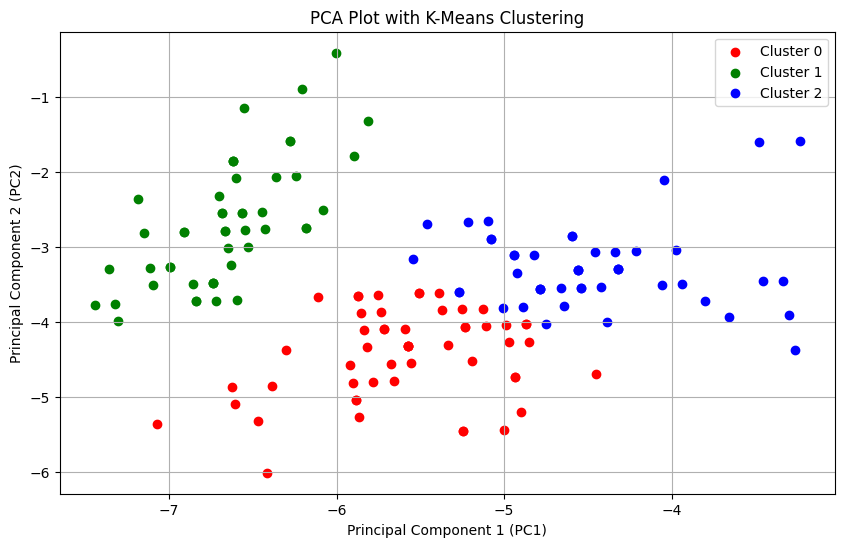

<bound method NDFrame.head of             Species  Cluster
0       Iris-setosa        1
1       Iris-setosa        1
2       Iris-setosa        1
3       Iris-setosa        1
4       Iris-setosa        1
..              ...      ...
145  Iris-virginica        2
146  Iris-virginica        0
147  Iris-virginica        2
148  Iris-virginica        2
149  Iris-virginica        0

[150 rows x 2 columns]>


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as SC
import sklearn.decomposition as SD
import sklearn.preprocessing as SP
import numpy as np
from sklearn.cluster import KMeans

data = pd.read_csv('iris_csv.csv')

#1
plt.figure(figsize=(8, 6))
plt.scatter(data['sepallength'], data['sepalwidth'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

scatter_matrix = pd.plotting.scatter_matrix(data.iloc[:, 0:4], figsize=(12, 12))
plt.show()

#2
X = data.iloc[:, 0:2].values #feature
y = data['class'].values  #separate spcies as label

X_std = SP.StandardScaler().fit(X).transform(X)

# Perform PCA
pca = SD.PCA().fit(X)
X_pca = pca.transform(X_std)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
data_with_pca = pd.concat([data, pca_df], axis=1)

# Create a PCA plot
plt.figure(figsize=(10, 6))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
for species, color in colors.items():
    subset = data_with_pca[data_with_pca['class'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=species)

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Plot of Iris Dataset')
plt.legend()
plt.grid(True)

plt.show()
"""
 the Iris species are somewhat distinct, but there is overlapping between the green and blue clusters
"""

#3
# Retrieve loadings
loadings = pca.components_

#4
original_data_corr = data.iloc[:, 0:4].corr()

pca_data_corr = pca_df[['PC1', 'PC2']].corr()

most_correlated_original = original_data_corr.abs().unstack().sort_values(ascending=False)
most_correlated_pca = pca_data_corr.abs().unstack().sort_values(ascending=False)

print("original data features:")
print(most_correlated_original.head(5))
print("\n")
print("PCA features:")
print(most_correlated_pca.head(5))

#5
kmeans = KMeans(n_clusters=3).fit(X_std)
cluster_predictions = kmeans.predict(X_std)

pca_df['Cluster'] = cluster_predictions

plt.figure(figsize=(10, 6))
colors = {0: 'red', 1: 'green', 2: 'blue'}
for cluster, color in colors.items():
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Plot with K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

pca_df['Species'] = data['class']
comparison_df = pca_df[['Species', 'Cluster']].copy()
print(comparison_df.head)
